<a href="https://colab.research.google.com/github/FaithOsamaye/Heart-disease-predicition/blob/main/Heart_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving heart image.jpg to heart image.jpg


# **Introduction**

The human heart is a finely-tuned instrument that serves the whole body. It is a muscular organ around the size of a closed fist, and it sits in the chest. The human heart is a four-chambered muscular organ, shaped and sized roughly like a man's closed fist with two-thirds of the mass to the left of midline.
Heart disease describes a range of conditions that affect the heart. Heart diseases include:

Blood vessel disease, such as:
1. coronary artery disease
2. Irregular heartbeats (arrhythmias)
3. Heart problems you're born with (congenital heart defects)
4. Disease of the heart muscle
5. Heart valve disease

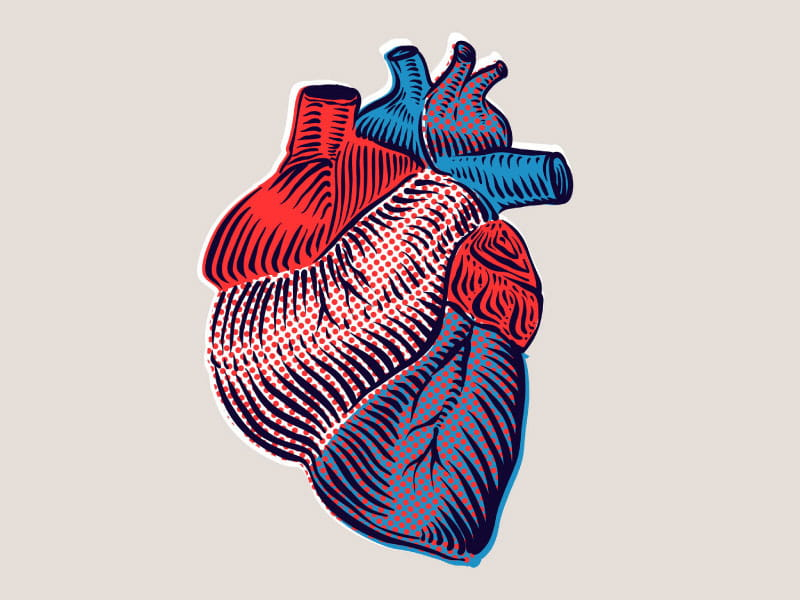

In [2]:
Image('heart image.jpg',width=1200)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
!pip install squarify
import squarify
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

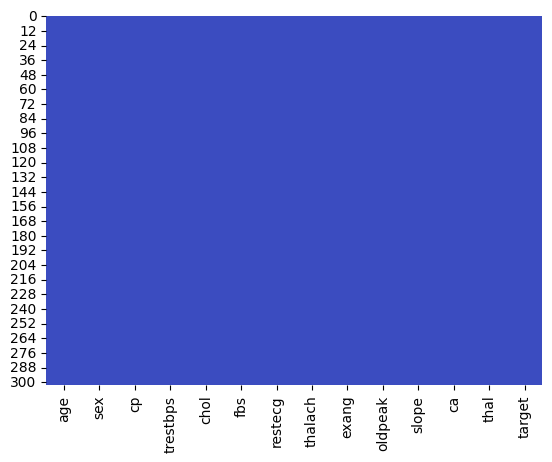

In [9]:
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)

**Creating a dummy data for visulization**

In [10]:
df_one = df.copy()

In [11]:
df_one['gender'] = df_one['sex'].map({0:'male', 1:'female'})
df_one['chestpain'] =df_one['cp'].map({0:'Typical angina',1:'Atypical angina',2:'Non-angina pain',3:'Asymptomatic'})
df_one['rest'] = df_one['restecg'].map({0:'Normal',1:'Abnormal',2:'Hypertrophy'})
df_one['slopepeak'] = df_one['slope'].map({0:'Upsloping',1:'Fat',2:'Downsloping'})
df_one['thalum'] = df_one['thal'].map({0:'Normal', 1:'Fixed defect', 2:'Reversible defect', 3:'Not described'})
df_one['heartdisease'] = df_one['target'].map({0:False,1:True})
df_one['blood sugar']=df_one['fbs'].map({0:'false',1:'true'})


In [12]:
bins = [20,40,50,70,80]

age_label = ['Young Age(25-44)','Middle Age(45-60)','Elderly Age(61-75)','Senile Age(76-80)']

df_one['age_range'] = pd.cut(df_one['age'], bins=bins, labels=age_label)

**EDA**

**1. What is the percentage of heart disease and no heart disease?**

In [13]:
hearts = df_one['heartdisease'].value_counts()

fig = px.pie(values = hearts.values, names=hearts.index,color = hearts.index,color_discrete_sequence=["mediumpurple", "lavender"],title='Heart Disease')

fig.show()

**2. What is the count of male and female in our case study? And amongst this distribution how many have heart disease?**

Text(0.5, 0, 'Gender')

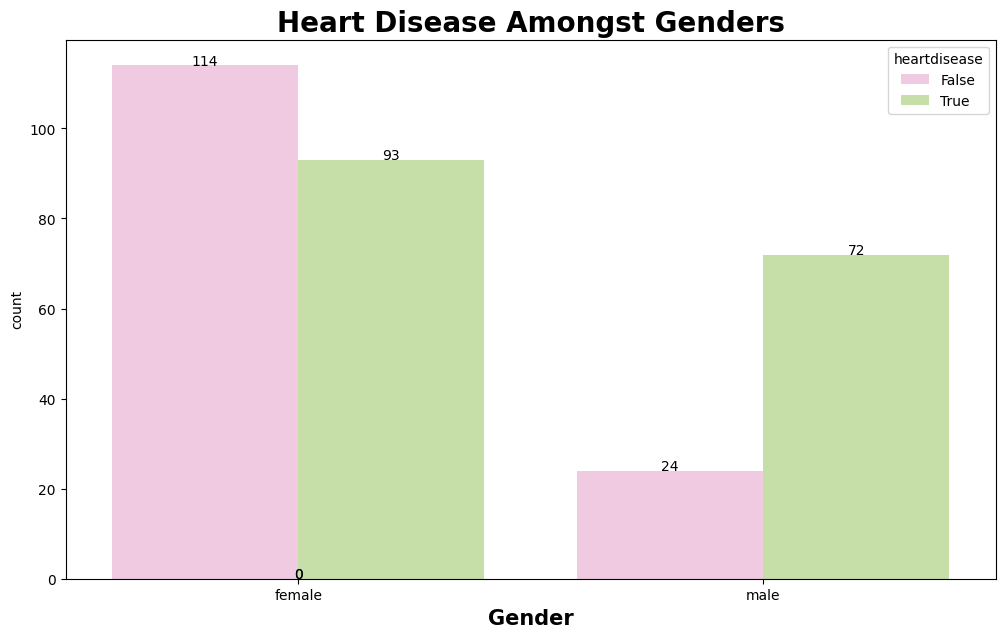

In [14]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='gender', hue='heartdisease', data = df_one, palette='PiYG')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
plt.title('Heart Disease Amongst Genders', weight='bold', fontsize=20)
plt.xlabel('Gender', weight='bold', size=15)

**3. What is our age distribution?**

Text(0.5, 1.0, 'Count of age categroty')

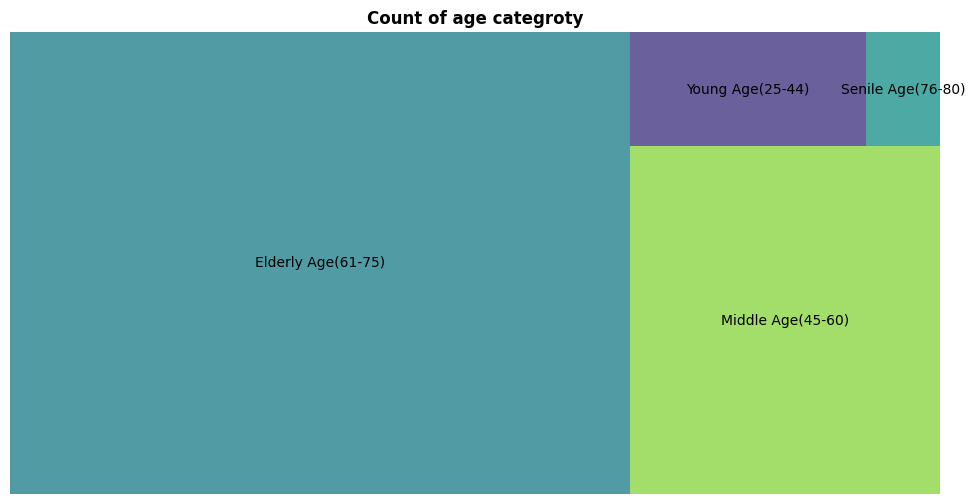

In [15]:
ages = df_one['age_range'].value_counts()
plt.figure(figsize=(12,6))
squarify.plot(sizes=ages.values, label=ages.index, alpha=.8)
plt.axis('off')
plt.title('Count of age categroty', weight='bold')

**4. What signs was most predominate in our clients? And were these signs responsible for heart diseases or not?**

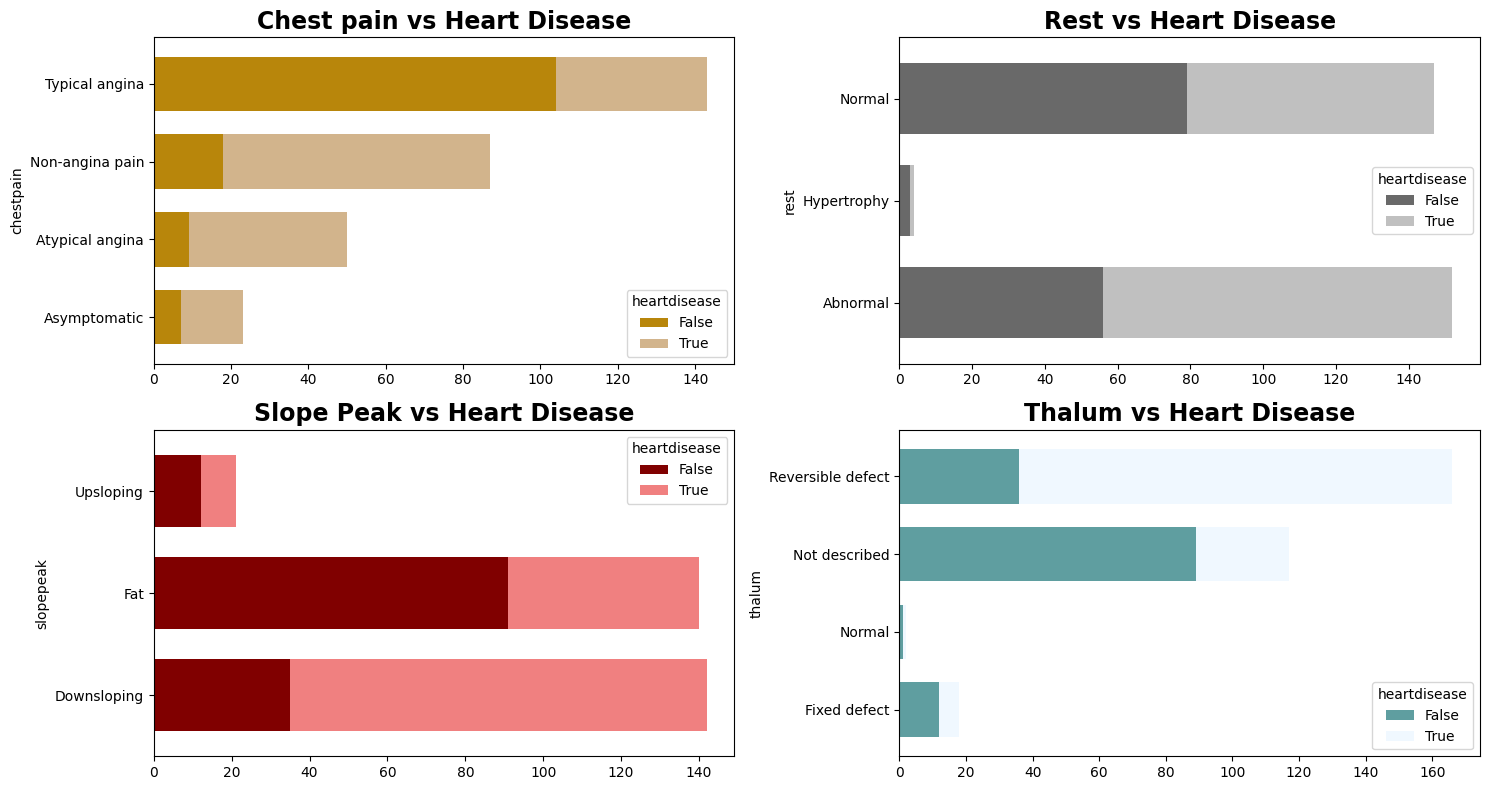

In [16]:
chest = df_one.groupby(['chestpain','heartdisease']).size().unstack()
rst = df_one.groupby(['rest','heartdisease']).size().unstack()
slope = df_one.groupby(['slopepeak','heartdisease']).size().unstack()
thal = df_one.groupby(['thalum','heartdisease']).size().unstack()


fig,axes = plt.subplots(2,2, figsize=(15,8))
chest.plot(kind='barh', stacked = True, ax=axes[0,0],color = ['darkgoldenrod','tan'],width=0.7)
axes[0,0].set_title('Chest pain vs Heart Disease', weight='bold', fontsize=17)

rst.plot(kind='barh', stacked = True, ax=axes[0,1],color = ['dimgrey','silver'],width=0.7)
axes[0,1].set_title('Rest vs Heart Disease', weight='bold', fontsize=17)

slope.plot(kind='barh', stacked = True, ax=axes[1,0],color = ['maroon','lightcoral'],width=0.7)
axes[1,0].set_title('Slope Peak vs Heart Disease', weight='bold', fontsize=17)

thal.plot(kind='barh', stacked = True, ax=axes[1,1],color = ['cadetblue','aliceblue'],width=0.7)
axes[1,1].set_title('Thalum vs Heart Disease', weight='bold', fontsize=17)
plt.tight_layout()

**5. How was the cholesterol level amongst age groups?**

Text(0.5, 1.0, 'Cholerestol level amongst ages')

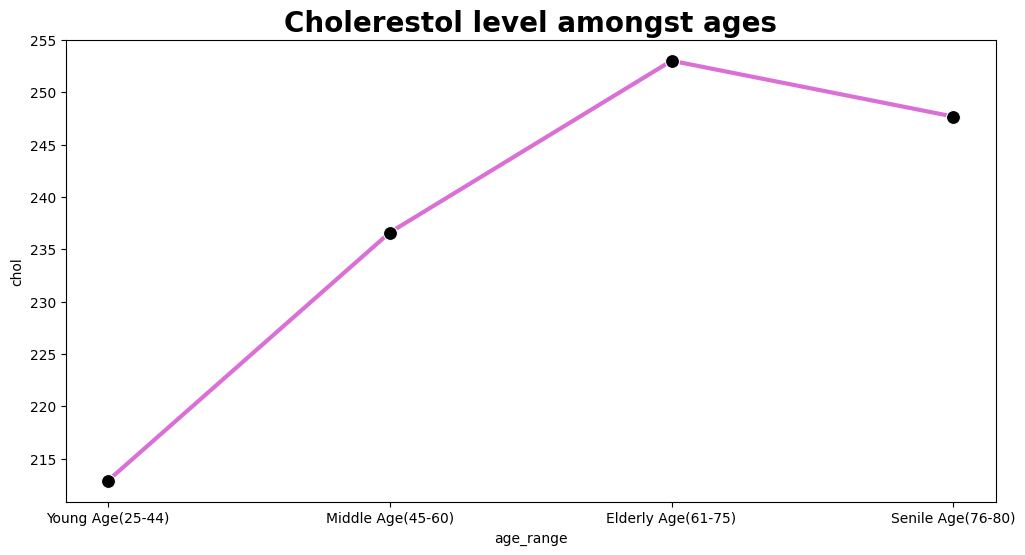

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age_range', y='chol', data=df_one, color='orchid', lw=3, marker='o', markersize=10, markerfacecolor='black', errorbar=None)
plt.title('Cholerestol level amongst ages', weight='bold', fontsize=20)

**6. The people who had high blood sugar, how many of them had heart diseases?**

In [18]:
fig = px.bar(df_one, x='blood sugar',y="heartdisease", color="gender", orientation="h", hover_name="heartdisease",
             color_discrete_sequence=["red", "green"],
             title="Blood Sugar Vs Heart Disease"
            )

fig.show()


# **Machine Learning**

**1. Logistic Regression**

In [80]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

In [81]:
X= df.drop('target', axis=1)
y = df['target']

In [82]:
ms = MinMaxScaler()

In [83]:
X = ms.fit_transform(X)

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [113]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [114]:
pred = lr.predict(X_test)

In [115]:
log_score = accuracy_score(y_test,pred)
log_score = round(log_score * 100, 2)
print(f'Accuracy for Support vector Model: {log_score}%')

Accuracy for Support vector Model: 85.25%


In [117]:
print(classification_report(pred,y_test))
print('\n')
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



[[25  5]
 [ 4 27]]


**2. KNN**

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

In [111]:
knn_score = accuracy_score(y_test,knn_pred)
knn_score = round(knn_score * 100, 2)
print(f'Accuracy for Support vector Model: {knn_score}%')

Accuracy for Support vector Model: 77.05%


In [112]:
print(classification_report(knn_pred,y_test))
print('\n')
print(confusion_matrix(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79        39
           1       0.62      0.91      0.74        22

    accuracy                           0.77        61
   macro avg       0.78      0.80      0.77        61
weighted avg       0.82      0.77      0.77        61



[[27 12]
 [ 2 20]]


**3. SVM**

In [107]:
from sklearn.svm import SVC

In [108]:
svc_model = SVC(kernel='linear')

svc_model.fit(X_train,y_train)

svm_pred = svc_model.predict(X_test)

In [109]:
svm_score = accuracy_score(y_test,svm_pred)
svm_score = round(svm_score * 100, 2)
print(f'Accuracy for Support vector Model: {svm_score}%')

Accuracy for Support vector Model: 85.25%


In [110]:
print(classification_report(svm_pred,y_test))
print('\n')
print(confusion_matrix(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



[[25  5]
 [ 4 27]]


**4. Random Forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(n_estimators=300)

In [99]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [100]:
rfc_pred = rfc.predict(X_test)

In [106]:
#Evaluate
score = accuracy_score(rfc_pred,y_test)
score = round(score * 100, 2)
print(f'Accuracy for Random Forest Model: {score}%')

Accuracy for Random Forest Model: 83.61%


In [102]:
print(classification_report(rfc_pred,y_test))
print('\n')
print(confusion_matrix(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



[[24  5]
 [ 5 27]]


# Tuning Hyperparameters
***We will tune hyperparameters to improve model performance and pick the best performer for final prediction***

#### a) Tuning and prediction for Logistic Regression

In [118]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10]}

# Initialize the Logistic Regression classifier
log_reg= LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=lr_param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
lr_best_params = grid_search.best_params_
print("Best hyperparameters for logistic regression model:", lr_best_params)

Best hyperparameters for logistic regression model: {'C': 10}


In [119]:
# Initialize the Logistic Regression classifier with the best hyperparameters
log_regression = LogisticRegression(C=10)

# Training
log_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_best_lr = log_regression.predict(X_test)

In [120]:
# Evaluate performance
print("Logistic Regression Performance with parameters:")
print(classification_report(y_test, y_pred_best_lr))

#accuracy score
lr_best_accuracy = accuracy_score(y_test, y_pred_best_lr)
lr_best_rounded_accuracy = round(lr_best_accuracy * 100, 2)
print(f'Accuracy for tuned Logistic Regression Model: {lr_best_rounded_accuracy}%')

Logistic Regression Performance with parameters:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy for tuned Logistic Regression Model: 83.61%


#### b) Tuning and prediction for KNN

In [121]:
# Define the parameter grid to search
knn_param_grid = {
    'n_neighbors': [1, 2, 3, 5, 7, 9, 11]}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
knn_best_params = grid_search.best_params_
print("Best hyperparameters:", knn_best_params)

Best hyperparameters: {'n_neighbors': 3}


In [122]:
# KNN prediction with best parameters
best_knn = KNeighborsClassifier(n_neighbors=knn_best_params['n_neighbors'])

# Training
best_knn.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_best_knn = best_knn.predict(X_test)

In [123]:
# Evaluate performance
print("KNN Performance with parameters:")
print(classification_report(y_test, y_pred_best_knn))

#accuracy score
knn_best_accuracy = accuracy_score(y_test, y_pred_best_knn)
knn_best_rounded_accuracy = round(knn_best_accuracy * 100, 2)
print(f'Accuracy for tuned KNN Model: {knn_best_rounded_accuracy}%')

KNN Performance with parameters:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

Accuracy for tuned KNN Model: 83.61%


#### c) Tuning and prediction for SVM

In [124]:
# Define the parameter grid to search
svm_param_grid = {
    'C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3, 4]
}
# Initialize the SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
svm_best_params = grid_search.best_params_
print("Best hyperparameters:", svm_best_params)

Best hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [125]:
# SVM prediction with best parameters
best_svm = SVC(**svm_best_params)

# Training
best_svm.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_best_svm = best_svm.predict(X_test)

In [126]:
# Evaluate performance
print("SVM Performance with parameters:")
print(classification_report(y_test, y_pred_best_svm))

#accuracy score
svm_best_accuracy = accuracy_score(y_test, y_pred_best_svm)
svm_best_rounded_accuracy = round(svm_best_accuracy * 100, 2)
print(f'Accuracy for tuned SVM Model: {svm_best_rounded_accuracy}%')

SVM Performance with parameters:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Accuracy for tuned SVM Model: 88.52%


#### d) Tuning and prediction for Random Forest

In [127]:
# Define the parameter grid to search
rf_param_grid = {
    'n_estimators': [10, 30, 50, 70, 100],
    'max_depth': [None, 2, 3, 4, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=rf_param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
rf_best_params = grid_search.best_params_
print("Best hyperparameters:", rf_best_params)


Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10}


In [128]:
# Random Forest prediction with best parameters
best_rf = RandomForestClassifier(**rf_best_params)

# Training
best_rf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_best_rf = best_rf.predict(X_test)

In [129]:
# Evaluate performance
print("Random Forest Performance with parameters:")
print(classification_report(y_test, y_pred_best_rf))

#accuracy score
rf_best_accuracy = accuracy_score(y_test, y_pred_best_rf)
rf_best_rounded_accuracy = round(rf_best_accuracy * 100, 2)
print(f'Accuracy for tuned Random Forest Model: {rf_best_rounded_accuracy}%')

Random Forest Performance with parameters:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy for tuned Random Forest Model: 86.89%


### Comparing model performance

In [132]:
print('Accuracy Scores Before Tuning:\n')
print(f'2.Logistic Regression Model: {log_score}%')
print(f'3.KNN Model: {knn_score}%')
print(f'4.SVM Model: {svm_score}%')
print(f'1.Random Forest Model: {score}%')

print('\n Accuracy Scores After Tuning:\n')
print(f'2.Logistic Regression Model: {lr_best_rounded_accuracy}%')
print(f'3.KNN Model: {knn_best_rounded_accuracy}%')
print(f'4.SVM Model: {svm_best_rounded_accuracy}%')
print(f'1.Random Forest Model: {rf_best_rounded_accuracy}%')

Accuracy Scores Before Tuning:

2.Logistic Regression Model: 85.25%
3.KNN Model: 77.05%
4.SVM Model: 85.25%
1.Random Forest Model: 83.61%

 Accuracy Scores After Tuning:

2.Logistic Regression Model: 83.61%
3.KNN Model: 83.61%
4.SVM Model: 88.52%
1.Random Forest Model: 86.89%


# **Trying it out on a new dataset on svm and random forest model after hypertuning**

In [133]:
hearts = pd.read_excel('/content/hearted_raw.xlsx')

In [135]:
heart = hearts.copy()
heart['svm result'] = best_svm.predict(heart)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,svm result
0,25,1,3,110,150,0,0,155,0,1.3,0,1,1,0
1,46,0,2,150,200,1,0,180,1,2.7,1,0,1,0
2,23,1,1,220,175,1,1,170,0,3.4,2,2,3,0
3,15,1,0,134,139,1,1,125,1,1.0,1,3,2,0
4,59,0,0,120,90,0,1,145,0,2.1,0,1,3,0


In [138]:
hearted = hearts.copy()
hearted['rf result'] = best_rf.predict(hearted)
hearted

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,rf result
0,25,1,3,110,150,0,0,155,0,1.3,0,1,1,0
1,46,0,2,150,200,1,0,180,1,2.7,1,0,1,0
2,23,1,1,220,175,1,1,170,0,3.4,2,2,3,0
3,15,1,0,134,139,1,1,125,1,1.0,1,3,2,0
4,59,0,0,120,90,0,1,145,0,2.1,0,1,3,0
